In [1]:
from nbodykit.lab import *
import pandas as pd
import numpy as np

zmin, zmax = 0.01, 0.15

# Load your data and randoms as Pandas DataFrames
sdss = pd.read_csv('../data/sdss_zmin_0.000_zmax_0.300_sigma_5.0.csv')
sdss  = sdss[(sdss["red"] > zmin)&(sdss["red"] < zmax)]
randoms = pd.read_csv('../data/random_sample_healpy_128.csv')  # Replace with your randoms CSV file path

# Convert DataFrames to ArrayCatalog with RA, DEC, and Redshift
data_cat = ArrayCatalog({'RA': sdss['ra'].values,
                         'DEC': sdss['dec'].values,
                         'Redshift': sdss['red'].values})

rand_cat = ArrayCatalog({'RA': randoms['ra'].values,
                         'DEC': randoms['dec'].values,
                         'Redshift': randoms['red'].values})

#data_cat['RA'] = np.radians(data_cat['RA'])
#data_cat['DEC'] = np.radians(data_cat['DEC'])
#rand_cat['RA'] = np.radians(rand_cat['RA'])
#rand_cat['DEC'] = np.radians(rand_cat['DEC'])

# Assign cosmology (if not already in the data)
cosmo = cosmology.Planck15

# Define the edges for s and mu bins
s_bins = np.linspace(30.,150.,30)  # smaller range for simplicity
mu_bins = 30  # fewer bins for testing

# Define the SurveyData2PCF object
result = SurveyData2PCF('2d', data_cat, rand_cat, edges=s_bins, Nmu=mu_bins, cosmo=cosmo, ra='RA', dec='DEC', redshift='Redshift')

# Access the computed correlation function
# xi_s_mu = result.corr.data  # 2D correlation function values
# s = result.corr.coords['r']  # The s bins
# mu = result.corr.coords['mu']  # The mu bins

# # Save or print results
# print("s:", s)
# print("mu:", mu)
# print("xi(s, mu):", xi_s_mu)

# # Optionally save the results to a file
# np.savez('xi_s_mu_results.npz', s=s, mu=mu, xi_s_mu=xi_s_mu)



In [6]:
len(randoms)

559275

TypeError: Dimensions of C (10, 9) are incompatible with X (10) and/or Y (9); see help(pcolormesh)

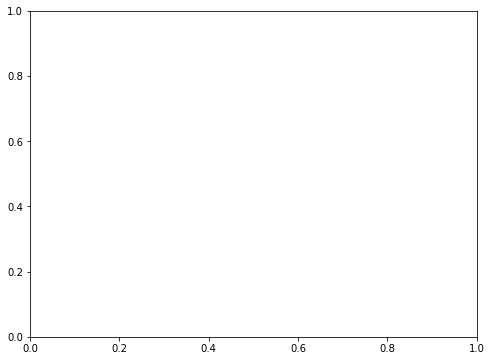

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Load the results (if saved) or use the variables directly
# data = np.load('xi_s_mu_results.npz')
# s = data['s']
# mu = data['mu']
# xi_s_mu = data['xi_s_mu']

# Ensure s and mu are arrays, not edges
s_centers = 0.5 * (s[1:] + s[:-1])  # Bin centers for s
mu_centers = mu  # Mu is already centered if Nmu was provided

# Create a 2D grid for plotting
s_grid, mu_grid = np.meshgrid(s, mu_centers, indexing='ij')

# Plotting
plt.figure(figsize=(8, 6))
plt.pcolormesh(mu_grid, s_grid, xi_s_mu.T, shading='auto', cmap='viridis')
plt.colorbar(label=r'$\xi(s, \mu)$')
plt.xlabel(r'$\mu$ (cosine of line of sight angle)')
plt.ylabel(r'$s$ (Mpc/h)')
#plt.title('2D Correlation Function: $\xi(s, \mu)$')
plt.tight_layout()
plt.show()


In [5]:

def get_xi0246(corr,nbins_m,nbins_s):
    
    import numpy as np
	
    xi_sm = corr.corr.data['corr']
    
    ##Modificado para que lea los valores de entrada
    ##nbins_m=30 # number of bins in mu
    ##nbins_s=29 # number of bins in s
    dmu=1.0/nbins_m
    
    rs = corr.D1D2.coords['r']
    mu = corr.D1D2.coords['mu']
    
    xi_s0 = np.zeros(nbins_s)
    xi_s2 = np.zeros(nbins_s)
    xi_s4 = np.zeros(nbins_s)
    xi_s6 = np.zeros(nbins_s)
    
    sr = np.zeros(nbins_s)
    rm = np.zeros(nbins_m)
    
    l0 = 0.0
    l1 = 1.0
    l2 = 2.0
    l3 = 3.0
    
    for i in range(nbins_s):
    	
        sr[i] = rs[i]
		
        for j in range(nbins_m):
            rm[j]=mu[j]
            xi_s0[i]  += (4.0*l0+1.0)*xi_sm[i,j]*1.0*dmu 
            xi_s2[i]  += (4.0*l1+1.0)*xi_sm[i,j]*((3*rm[j]**2 - 1.0)/2.0)*dmu
            xi_s4[i]  += (4.0*l2+1.0)*xi_sm[i,j]*((35*rm[j]**4 - 30*rm[j]**2 + 3.0)/8.0)*dmu
            xi_s6[i]  += (4.0*l3+1.0)*xi_sm[i,j]*((231*rm[j]**6 - 315*rm[j]**4 + 105*rm[j]**2 - 5)/16.0)*dmu
    
    return xi_s0, xi_s2, xi_s4, xi_s6

xi_l = get_xi0246(result,len(s_bins),mu_bins-1)


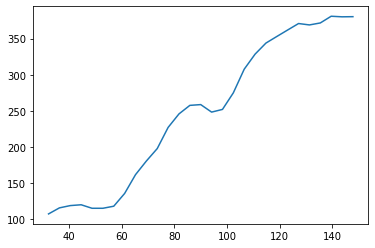

In [7]:
import matplotlib.pyplot as plt

plt.plot(result.corr.coords['r'] ,xi_l[0]*result.corr.coords['r']**2)
plt.show()